In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [2]:
nbie_data = pd.read_csv('nbie_log.csv')

nbie_data.columns = ['a']

nbie_data = nbie_data["a"].str.split("/", n = 1, expand = True) 

nbie_data.columns = ['1', '2']

groupOneKeys = ['579-5987 ', '580-5987 ', '582-5987 ', '583-5987 ','579-5988 ', '580-5988 ', '582-5988 ', '583-5988 ']
allGroupKeys = ['579-5987 ', '579-5988 ', '580-5987 ', '580-5988 ','583-5987 ', '583-5988 ', '582-5987 ', '582-5988 ', '4426-5987 ', '4426-5988 ', '4425-5987 ', '4425-5988 ', '4429-5987 ', '4429-5988 ', '4428-5987 ', '4428-5988 ', '3251-5987 ', '3251-5988 ', '3252-5987 ', '3252-5988 ', '583-5987 ', '583-5988 ', '582-5987 ', '582-5988 ', '5978-1072 ', '5978-1073 ', '5979-1072 ', '5979-1073 ', '5980-1072 ', '5980-1073 ', '1093-5966', '1094-5966 ', '1096-5966 ', '1097-5966 ']
groupKeys    = ['G0 ', 'G1 ', 'G2 ', 'G3 ', 'G4 ', 'RMSD ']

dataframe_collection = {} 

for k in groupKeys:
    new_data = nbie_data.loc[nbie_data['1'] == k]
    dataframe_collection[k] = pd.DataFrame(new_data, columns=["2"])

energies_ = []

for k in groupKeys:
    d = dataframe_collection[k]
    temp = np.asarray(d['2'].tolist(), dtype=np.float32)
    energies_.append(temp)

energies_ = np.asarray(energies_)



-1.53483
-0.0617134


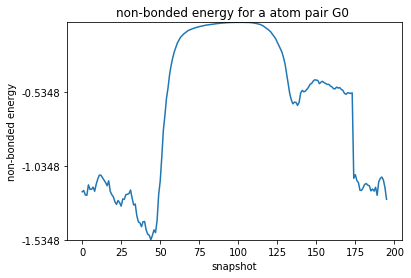

-2.15865
-0.0646564


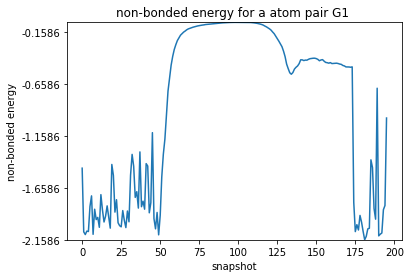

-1.65454
-0.0614161


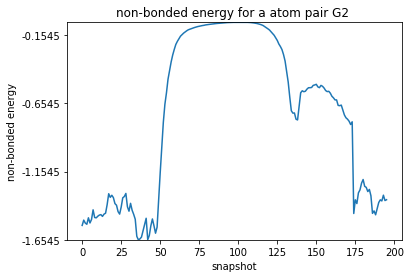

-2.08983
3.73951


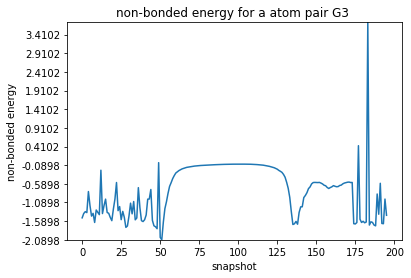

-1.49451
-0.0515487


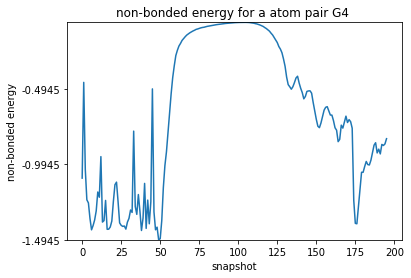

0.195957
9.44341


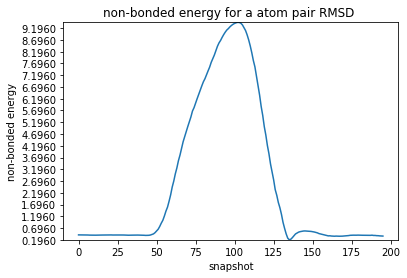

In [3]:
count = 0
for e in energies_:
    max = np.max(e)
    min = np.min(e)
    
    print(min)
    print(max)

    fig, ax = plt.subplots()

    ax.plot(e)

    name = groupKeys[count]
    count = count+1
    t = 'non-bonded energy for a atom pair ' + name
    ax.set(xlabel='snapshot', ylabel='non-bonded energy', title=t)

    plt.ylim(min, max)  
    y_ticks = np.arange(min, max, 0.5)
    plt.yticks(y_ticks)

    ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))

    plt.savefig('non-bonded-analysis for pair ' + name)

    plt.show()
    


In [ ]:
sum = energies_.sum(axis=0)

max = np.max(sum)
min = np.min(sum)
    
print(min)
print(max)

fig, ax = plt.subplots()

ax.plot(sum)

ax.set(xlabel='snapshot', ylabel='non-bonded energy', title='non-bonded energy for a whole interaction group')

plt.ylim(min, max)  
y_ticks = np.arange(min, max, 0.05)
plt.yticks(y_ticks)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))

plt.savefig('non-bonded-analysis for a whole interaction group')

plt.show()

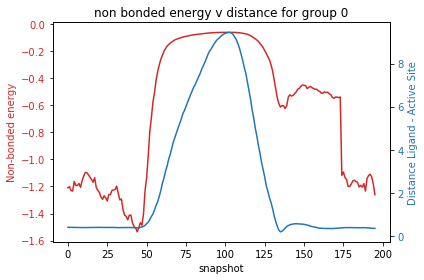

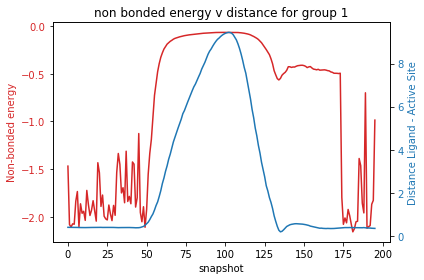

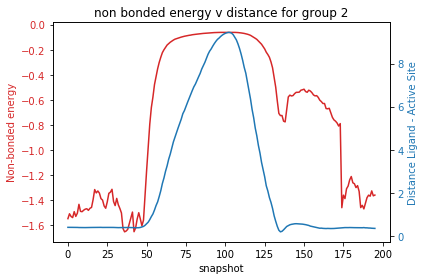

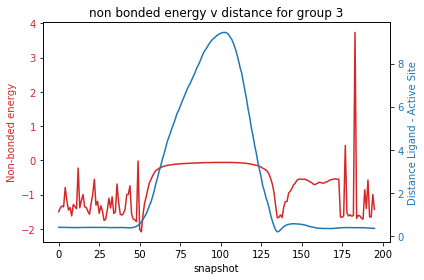

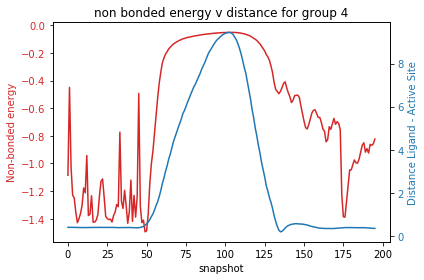

In [37]:
loop=np.arange(0, 5, 1)
for i in loop:
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('snapshot')
    ax1.set_ylabel('Non-bonded energy', color=color)
    ax1.set_title('non bonded energy v distance for group ' + str(i))
    ax1.plot(energies_[i], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Distance Ligand - Active Site', color=color)  # we already handled the x-label with ax1
    ax2.plot(energies_[5], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    t = 'non-bonded-energy v distance for group ' + str(i)
    plt.savefig(t)
    plt.show()
